<h3 style="color: pink">❓Câu hỏi chính:</h3>

**Mối quan hệ cân bằng tối ưu giữa số tập, thời lượng mỗi tập và lịch phát hành để tối đa hóa cả lượt xem và đánh giá phê bình là gì?**

**Ảnh hưởng:** Xác định điểm cân bằng trong các lựa chọn sản xuất giúp cân bằng hiệu quả chi phí với sự hài lòng và tương tác của khán giả.

**Ý tưởng giải quyết:** Xác định rõ mục tiêu là tối đa hóa Popularity (lượt xem) và Score (đánh giá phê bình), đồng thời xem xét các thuộc tính như Episodes (số tập) và Time per ep (Min) (thời lượng mỗi tập). Sau đó, thực hiện phân tích dữ liệu bằng cách kiểm tra mối tương quan giữa các thuộc tính thông qua biểu đồ phân tán để phát hiện những yếu tố quan trọng như số tập hoặc thời lượng mỗi tập có ảnh hưởng như thế nào đến Popularity và Score. Sau khi làm sạch dữ liệu và kiểm tra sự phân phối, áp dụng thuật toán K-Means để phân cụm các anime thành các nhóm (clusters) dựa trên sự tương đồng về số tập, thời lượng mỗi tập, độ phổ biến và đánh giá. Khi các cụm đã được hình thành, tiến hành phân tích đặc điểm của từng cụm để đưa ra số tập, thời lượng mỗi tập hợp lí.

---

<h3 style="color: pink">Cài đặt các thư viện</h3>

---

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from PATHS import HOME, DATASET_PATH, ANIME_DATASET_2023, DATA_PREPROCESSING

Kiểm tra các đường dẫn đến các folders và các files

In [19]:
print('HOME', HOME)
print('DATASET FOLDER', DATASET_PATH)
print('ANIME DATASET 2023', ANIME_DATASET_2023)
print('DATA PREPROCESSING', DATA_PREPROCESSING)

HOME d:\Data Science Programming\Project
DATASET FOLDER d:\Data Science Programming\Project\raw_animes_dataset
ANIME DATASET 2023 d:\Data Science Programming\Project\raw_animes_dataset\anime-dataset-2023.csv
DATA PREPROCESSING d:\Data Science Programming\Project\Data Preprocessing


<h3 style="color: pink">Đọc dữ liệu từ file</h3>

---

In [20]:
anime_clean_df = pd.read_csv(os.path.join(DATA_PREPROCESSING, 'anime-data-preprocessing.csv'))
anime_clean_df

,Name,Score,Genres,Synopsis,Type,Episodes,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
0,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24.00,R - 17+ (violence & profanity),1,3,217606,2020030,3176556,2009-04-05,2010-07-04
1,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,24.0,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,Visual novel,24.00,PG-13 - Teens 13 or older,2,13,182964,1336233,2440369,2011-04-06,2011-09-14
2,Bleach: Sennen Kessen-hen,9.07,"Action, Adventure, Fantasy",Substitute Soul Reaper Ichigo Kurosaki spends ...,TV,13.0,"TV Tokyo, Aniplex, Dentsu, Shueisha",Pierrot,Manga,24.00,R - 17+ (violence & profanity),3,464,17999,213872,445198,2022-10-11,2022-12-27
3,Gintama°,9.06,"Action, Comedy, Sci-Fi","Gintoki, Shinpachi, and Kagura return as the f...",TV,51.0,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,24.00,PG-13 - Teens 13 or older,4,331,15947,237957,595767,2015-04-08,2016-03-30
4,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama",Seeking to restore humanity's diminishing hope...,TV,10.0,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,23.00,R - 17+ (violence & profanity),5,24,55245,1471825,2104016,2019-04-29,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13829,Kokuhaku,2.30,Horror,"Beside a certain building, a girl appears to m...",ONA,1.0,UNKNOWN,UNKNOWN,Original,0.67,R - 17+ (violence & profanity),13830,7105,17,4904,6697,2015-08-27,2015-08-27
13830,Hametsu no Mars,2.22,"Horror, Sci-Fi",Several months after a probe returning from Ma...,OVA,1.0,"Idea Factory, King Records, Design Factory",WAO World,Visual novel,19.00,R - 17+ (violence & profanity),13831,2512,295,47630,65622,2005-07-06,2005-07-06
13831,Tsui no Sora,2.22,Hentai,"After the sudden death of a student, mysteriou...",OVA,1.0,Obtain Future,UNKNOWN,Visual novel,23.00,Rx - Hentai,13832,7563,24,3436,5713,2002-08-10,2002-08-10
13832,Utsu Musume Sayuri,1.98,"Avant Garde, Comedy",Sayuri is a curious creature who lives on her ...,OVA,1.0,UNKNOWN,UNKNOWN,Original,3.00,R+ - Mild Nudity,13833,4492,50,15873,20789,2003-01-01,2003-01-01


<h3 style="color: pink">Tiền xử lý dữ liệu</h3>

---

Kiểm tra các thuộc tính của tập dữ liệu

In [21]:
anime_clean_df.keys()

Index(['Name', 'Score', 'Genres', 'Synopsis', 'Type', 'Episodes', 'Producers',
       'Studios', 'Source', 'Time per ep (Min)', 'Rating', 'Rank',
       'Popularity', 'Favorites', 'Scored By', 'Members', 'Released date',
       'Completed date'],
      dtype='object')

Tiến hành loại bỏ các thuộc tính không liên quan tới câu hỏi, chỉ giữ lại các thuộc tính để phân tích như `Episodes`, `Time per ep (Min)`, `Released date`, `Completed date`, `Score` ,`Scored By`, `Popularity`, `Rank`

In [22]:
filtered_df = anime_clean_df[['Episodes', 'Time per ep (Min)', 'Score' ,'Scored By', 'Popularity', 'Rank']]
filtered_df

,Episodes,Time per ep (Min),Score,Scored By,Popularity,Rank
0,64.0,24.00,9.10,2020030,3,1
1,24.0,24.00,9.07,1336233,13,2
2,13.0,24.00,9.07,213872,464,3
3,51.0,24.00,9.06,237957,331,4
4,10.0,23.00,9.05,1471825,24,5
...,...,...,...,...,...,...
13829,1.0,0.67,2.30,4904,7105,13830
13830,1.0,19.00,2.22,47630,2512,13831
13831,1.0,23.00,2.22,3436,7563,13832
13832,1.0,3.00,1.98,15873,4492,13833


Kiểm tra các cột có giá trị `UNKNOWN` hoặc `Unknown`

In [23]:
# Kiểm tra các cột có giá trị Unknown hoặc UNKNOWN
unknown_columns = []

for column in filtered_df.columns:
    if filtered_df[column].isin(['Unknown', 'UNKNOWN']).any():
        unknown_columns.append(column)

# In ra danh sách các cột có giá trị Unknown hoặc UNKNOWN
print("Các cột có giá trị 'Unknown' hoặc 'UNKNOWN':")
print(unknown_columns)

Các cột có giá trị 'Unknown' hoặc 'UNKNOWN':
[]


Đếm số lượng các ô trống của các cột thuộc tính

In [24]:
filtered_df.isnull().sum()

Episodes             0
Time per ep (Min)    0
Score                0
Scored By            0
Popularity           0
Rank                 0
dtype: int64

Kiểm tra kiểu dữ liệu của các cột trong tập dữ liệu

In [25]:
# Xem kiểu dữ liệu của các cột trong filtered_df
filtered_df.dtypes

Episodes             float64
Time per ep (Min)    float64
Score                float64
Scored By              int64
Popularity             int64
Rank                   int64
dtype: object

Tạo thêm cột `Total Duration` nhằm thể hiện mối quan hệ giữa hai cột `Time per ep (Min)` và `Episodes`. Cột này thể hiện tổng số thời gian mà một bộ anime chiếu, các giá trị trong cột `Total Duration` là kết quả của `Time per ep (Min)` nhân với `Episodes`

In [26]:
filtered_df['Total Duration'] = filtered_df['Time per ep (Min)'] * filtered_df['Episodes']
filtered_df

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_15036\2798716943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Total Duration'] = filtered_df['Time per ep (Min)'] * filtered_df['Episodes']


,Episodes,Time per ep (Min),Score,Scored By,Popularity,Rank,Total Duration
0,64.0,24.00,9.10,2020030,3,1,1536.00
1,24.0,24.00,9.07,1336233,13,2,576.00
2,13.0,24.00,9.07,213872,464,3,312.00
3,51.0,24.00,9.06,237957,331,4,1224.00
4,10.0,23.00,9.05,1471825,24,5,230.00
...,...,...,...,...,...,...,...
13829,1.0,0.67,2.30,4904,7105,13830,0.67
13830,1.0,19.00,2.22,47630,2512,13831,19.00
13831,1.0,23.00,2.22,3436,7563,13832,23.00
13832,1.0,3.00,1.98,15873,4492,13833,3.00


<h3 style="color: pink">Khám phá dữ liệu</h3>

---

Trực quan hóa ma trận tương quan giữa các cột thuộc tính bằng biểu đồ nhiệt `heat map`

In [27]:
# Tính toán ma trận tương quan giữa các cột có liên quan
correlation_matrix = filtered_df[['Episodes', 'Time per ep (Min)', 'Total Duration', 'Score', 'Scored By', 'Popularity', 'Rank']].corr()

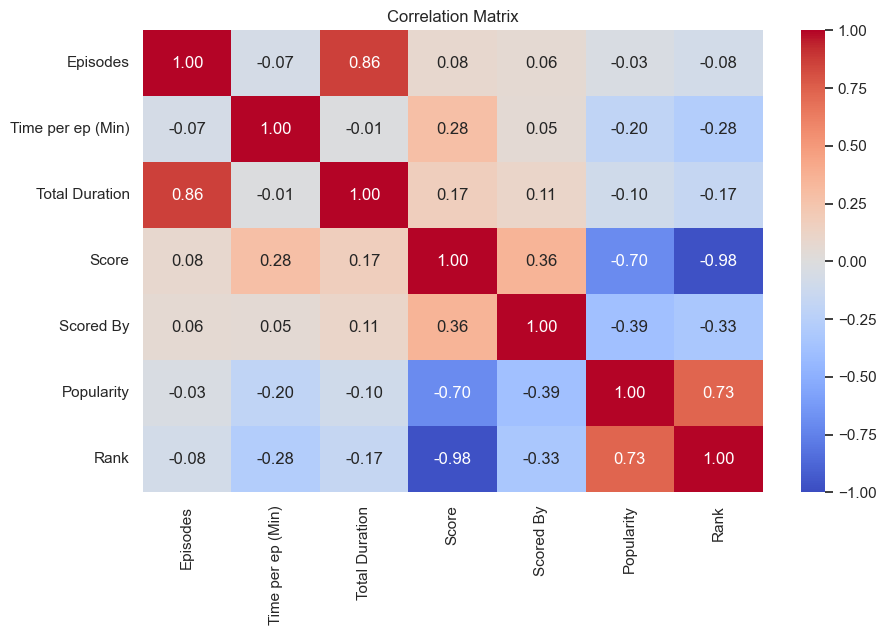

In [28]:
# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Nhận xét**
- Chất lượng không đồng nghĩa với sự phổ biến: Một anime có điểm số cao không nhất thiết phải là một anime được nhiều người xem. Có thể một số anime chất lượng cao (theo đánh giá của người xem) nhưng lại không được biết đến rộng rãi hoặc không thu hút đông đảo khán giả.

- Phổ biến không đồng nghĩa với chất lượng: Các anime phổ biến có thể không phải lúc nào cũng có chất lượng đánh giá tốt. Đôi khi, anime được nhiều người xem không phải vì nó hay, mà vì nó dễ tiếp cận hoặc vì lý do marketing, tên tuổi, hoặc thương hiệu.

- Vì `Popularity` có mối tương quan dương mạnh với `Rank`, nên sẽ giữ lại thuộc tính `Popularity`, không xét thuộc tính `Score`

Thực hiện trực quan hóa mối quan hệ giữa các cột `Total Duration`, `Time per ep (Min)`, `Episodes` với cột mục tiêu `Popularity` bằng biểu đồ `scatter plot`

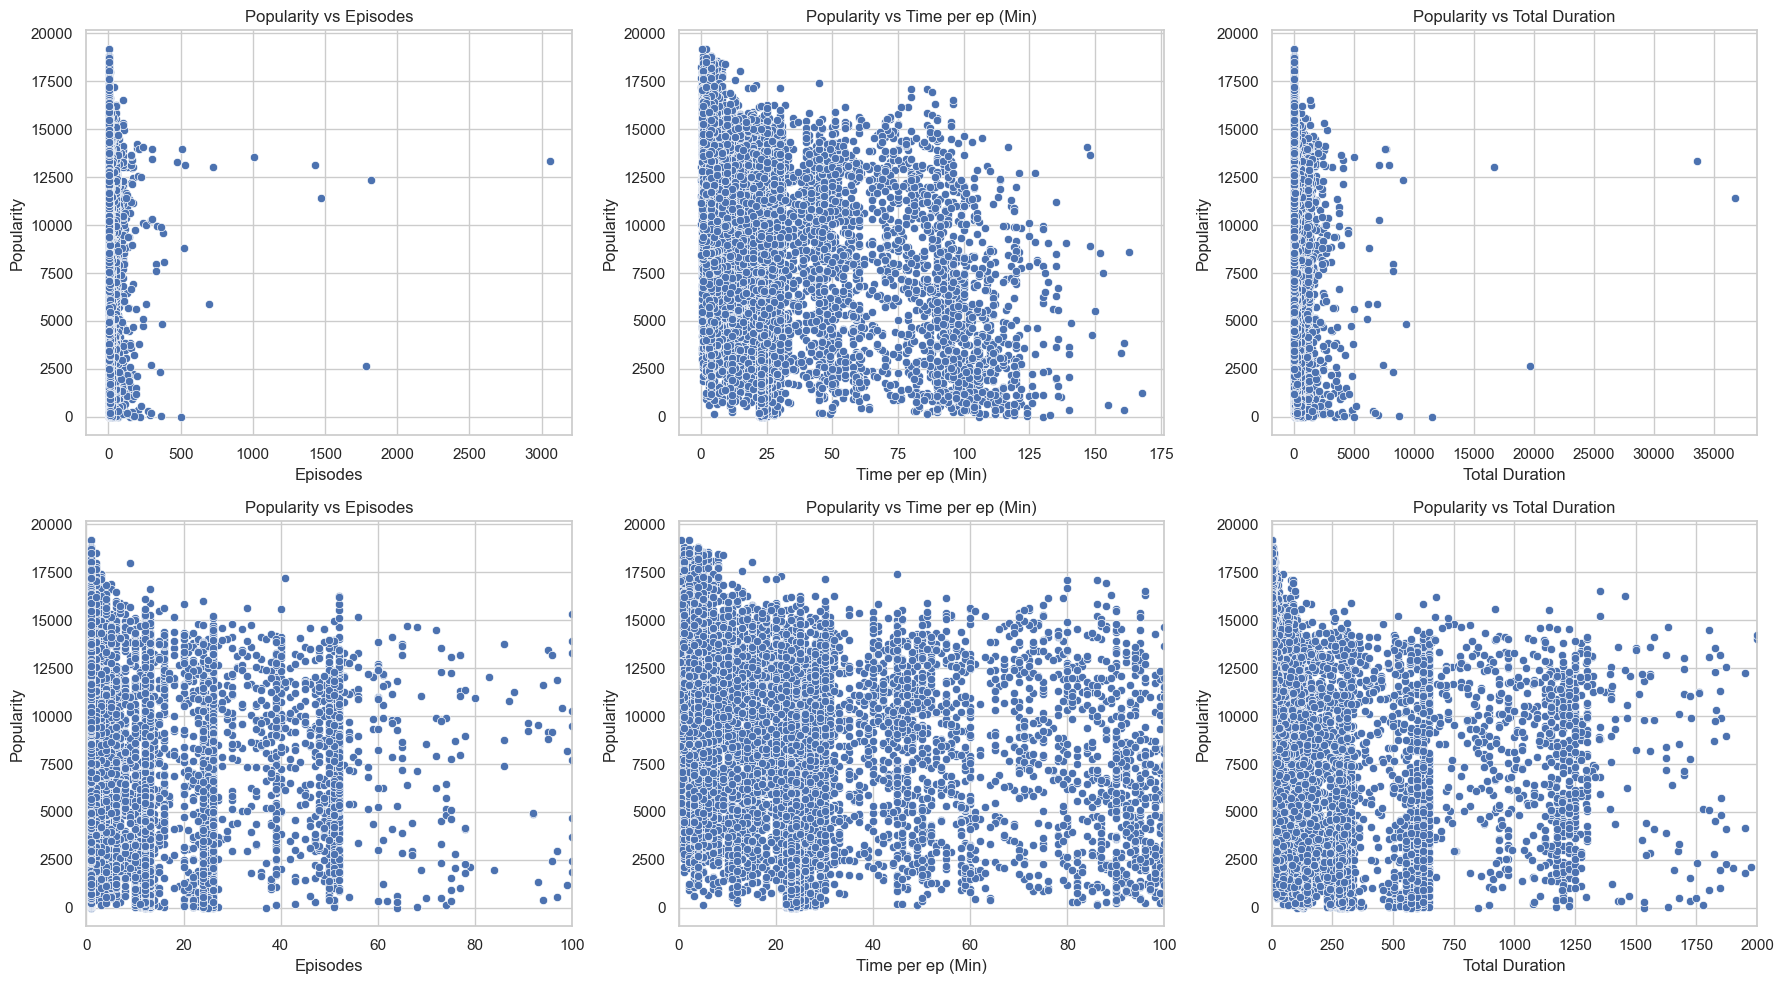

In [29]:
# Thiết lập phong cách biểu đồ với Seaborn
sns.set(style="whitegrid")

# Vẽ biểu đồ Popularity so với Episodes, Duration, và Total Duration

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Biểu đồ Popularity vs Episodes
sns.scatterplot(x='Episodes', y='Popularity', data=filtered_df, ax=axes[0, 0])
axes[0, 0].set_title('Popularity vs Episodes')

# Biểu đồ Popularity vs Duration
sns.scatterplot(x='Time per ep (Min)', y='Popularity', data=filtered_df, ax=axes[0, 1])
axes[0, 1].set_title('Popularity vs Time per ep (Min)')

# Biểu đồ Popularity vs Total Duration
sns.scatterplot(x='Total Duration', y='Popularity', data=filtered_df, ax=axes[0, 2])
axes[0, 2].set_title('Popularity vs Total Duration')

# Chi tiết về 3 biểu đồ 
sns.scatterplot(x='Episodes', y='Popularity', data=filtered_df, ax=axes[1, 0])
axes[1, 0].set_xlim([0, 100])
axes[1, 0].set_title('Popularity vs Episodes')

# Biểu đồ Popularity vs Duration
sns.scatterplot(x='Time per ep (Min)', y='Popularity', data=filtered_df, ax=axes[1, 1])
axes[1, 1].set_xlim([0, 100])
axes[1, 1].set_title('Popularity vs Time per ep (Min)')

# Biểu đồ Popularity vs Total Duration
sns.scatterplot(x='Total Duration', y='Popularity', data=filtered_df, ax=axes[1, 2])
axes[1, 2].set_xlim([0, 2000])
axes[1, 2].set_title('Popularity vs Total Duration')

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét**
- Các bộ anime không nhất thiết phải có số tập nhiều và thời lượng mỗi tập nhiều mới đạt được `Popularity` cao
- Đa số các bộ anime có `Popularity` cao thì có số tập `Episodes` khoảng 60 tập và thời gian mỗi tập trong khoảng 0-40 phút


Áp dụng thuật toán KMeans để phân cụm các bộ anime, sau đó dựa trên `Score` trung bình của mỗi cụm để nhận biết khoảng giá trị tốt nhất mà số tập và thời lượng chiếu của mỗi tập là bao nhiêu

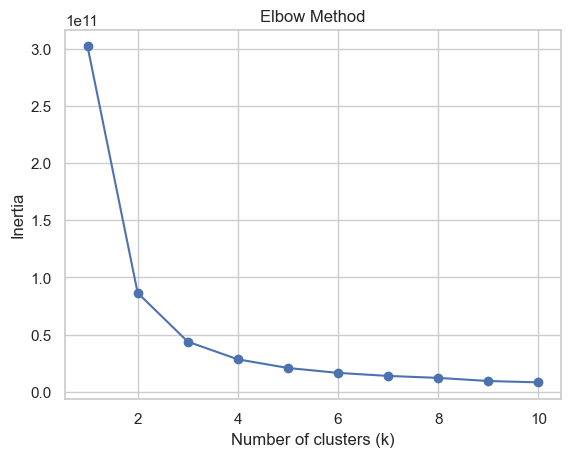

In [30]:
# Giả sử bạn có dữ liệu X
inertia = []
for k in range(1, 11):  # thử các giá trị k từ 1 đến 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(filtered_df[['Episodes', 'Time per ep (Min)', 'Popularity', 'Total Duration']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [31]:
# Apply clustering
kmeans = KMeans(n_clusters=3, random_state=42)
filtered_df['Cluster'] = kmeans.fit_predict(filtered_df[['Episodes', 'Time per ep (Min)', 'Popularity', 'Total Duration']])

for cluster_num in filtered_df['Cluster'].unique():
    cluster_data = filtered_df[filtered_df['Cluster'] == cluster_num]
    print(f"Cluster {cluster_num}:")
    print(cluster_data[['Popularity', 'Episodes', 'Time per ep (Min)', 'Total Duration']].describe())

Cluster 2:
        Popularity     Episodes  Time per ep (Min)  Total Duration
count  4992.000000  4992.000000        4992.000000     4992.000000
mean   2556.246795    13.916066          31.216238      313.670280
std    1499.078323    34.492723          26.437895      618.447936
min       1.000000     1.000000           0.250000        0.250000
25%    1254.750000     1.000000          23.000000       57.750000
50%    2533.500000    12.000000          24.000000      264.000000
75%    3846.500000    13.000000          25.000000      300.000000
max    5200.000000  1787.000000         168.000000    19657.000000
Cluster 0:
         Popularity     Episodes  Time per ep (Min)  Total Duration
count   4835.000000  4835.000000        4835.000000     4835.000000
mean    7845.319338    10.021096          27.235969      194.655696
std     1543.216976    25.513485          25.157173      457.615780
min     5189.000000     1.000000           0.120000        0.120000
25%     6514.500000     1.000000   

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_15036\1460382389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = kmeans.fit_predict(filtered_df[['Episodes', 'Time per ep (Min)', 'Popularity', 'Total Duration']])


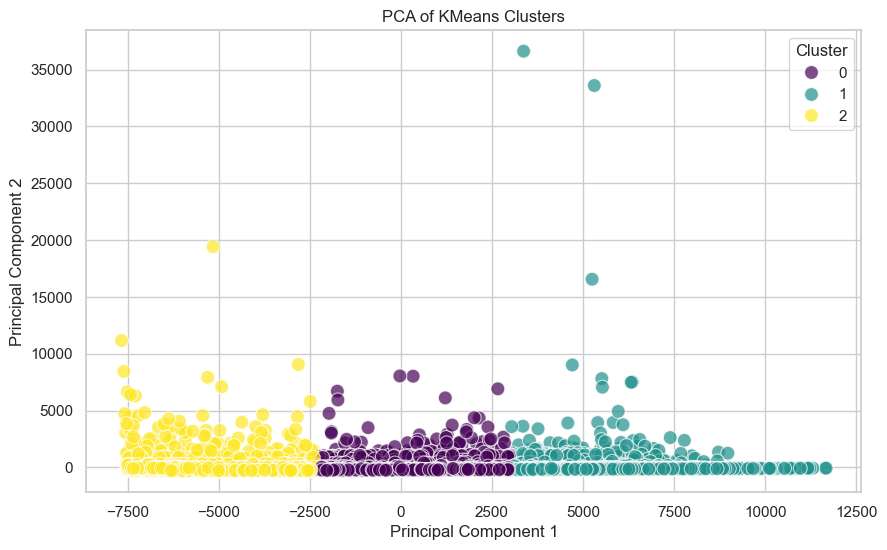

In [32]:

# Áp dụng PCA để giảm số chiều xuống 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(filtered_df[['Episodes', 'Popularity', 'Time per ep (Min)', 'Total Duration']])

# Tạo DataFrame mới với các thành phần chính
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Vẽ scatter plot của PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA of KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [33]:
# Generate recommendations
high_perf_clusters = filtered_df[filtered_df['Cluster'] == 1]
print("Recommended Episode Count and Duration:")
print(high_perf_clusters[['Episodes', 'Time per ep (Min)', 'Total Duration']].describe())

Recommended Episode Count and Duration:
          Episodes  Time per ep (Min)  Total Duration
count  4007.000000        4007.000000     4007.000000
mean     11.633641          20.176516      182.733284
std      71.820546          23.210320      947.032473
min       1.000000           0.100000        0.170000
25%       1.000000           3.000000        4.000000
50%       1.000000          11.000000       24.000000
75%       5.000000          26.000000       84.000000
max    3057.000000         148.000000    36775.000000


**Nhận xét**

- Phần lớn các anime trong dữ liệu này có số tập rất ít, từ 1 đến 5 tập (phân vị 25% đến 75% là 1 đến 5 tập). Điều này cho thấy rằng người xem có xu hướng chọn các anime ngắn, dễ tiếp cận và tiêu thụ trong thời gian ngắn.

-> **Các nhà sản xuất nên cân nhắc sản xuất các chương trình hoặc series có khoảng 1 đến 5 tập, vì đây là số lượng tập phổ biến và dễ dàng thu hút người xem.**

- Thời gian mỗi tập phần lớn dưới 30 phút (phân vị 75% là 26 phút), với một số tập cực kỳ ngắn (như chỉ 3 phút). Điều này cho thấy người xem có xu hướng thích các nội dung ngắn gọn, dễ tiêu thụ.

-> **Để phù hợp với thói quen người dùng ngày nay, đặc biệt với sự phổ biến của các video trên mạng xã hội và các nền tảng phát trực tuyến, các anime có thời gian mỗi tập từ 10 đến 30 phút sẽ là lựa chọn lý tưởng. Điều này cho phép người xem dễ dàng theo dõi mà không mất quá nhiều thời gian.**